In [1]:
import pandas as pd

In [2]:
messages = pd.read_csv('train_2kmZucJ.csv')
messages.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Exploratory Analysis

In [4]:
#messages.describe()

In [8]:
messages.groupby('label').describe()

id                                                                 
        count         mean          std  min      25%     50%      75%     max
label                                                                         
0      5894.0  3954.497285  2290.734085  1.0  1971.25  3958.5  5927.50  7920.0
1      2026.0  3977.962981  2274.419827  5.0  2019.50  3968.5  5966.75  7914.0

In [10]:
messages['length'] = messages['tweet'].apply(len)
messages.head()

,id,label,tweet,length
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,128
1,2,0,Finally a transparant silicon case ^^ Thanks t...,131
2,3,0,We love this! Would you go? #talk #makememorie...,123
3,4,0,I'm wired I know I'm George I was made that wa...,112
4,5,1,What amazing service! Apple won't even talk to...,124


## Data Visualisation

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Dipanshu Das\Anaconda_new\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


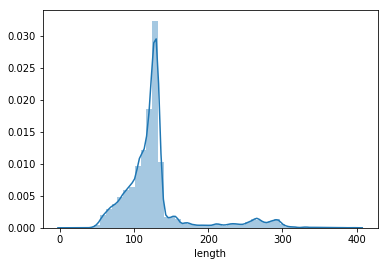

In [14]:
sns.distplot(messages['length'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A53D9156A0>,
      dtype=object)

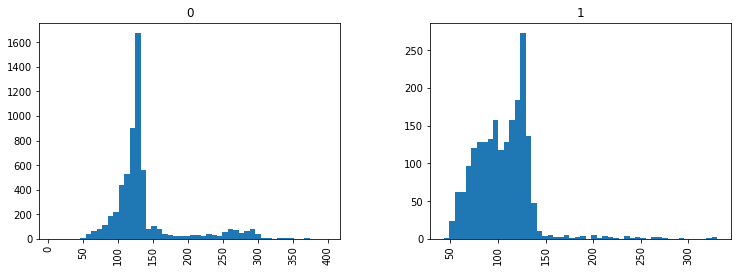

In [15]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

In [16]:
import string

In [17]:
from nltk.corpus import stopwords

In [18]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(messages['tweet'], messages['label'], test_size=0.3)

In [23]:
from sklearn.pipeline import Pipeline

In [51]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [52]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001A53E949840>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [53]:
predictions = pipeline.predict(msg_test)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(label_test,predictions))

             precision    recall  f1-score   support

          0       0.89      0.93      0.91      1791
          1       0.76      0.64      0.69       585

avg / total       0.86      0.86      0.86      2376



In [34]:
df1=pd.read_csv('test_oJQbWVk.csv')

In [35]:
df1.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [56]:
output = pipeline.predict(df1['tweet'])

In [46]:
df3=pd.DataFrame(data=df1['id'],columns=['id'])

In [47]:
df3.head()

,id
0,7921
1,7922
2,7923
3,7924
4,7925


In [57]:
df3['label']=output

In [58]:
df3.to_csv('output2.csv')